##Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
C
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

##dataset

Montamos Google Drive y cargamos el dataset del banco que contiene la información de la campaña de marketing.

Si la carpeta del proyecto no se encuentra en google drive, se recomienda subir el archivo de datos en el google colab, o escribir la ruta del archivo en el que se encuentre si se emplea otro entorno de ejecución del código.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
csv_path = "/content/gdrive/MyDrive/Consultoría. Laboratorio/data/bank-additional-full.csv"
data = pd.read_csv(csv_path, sep=";")

##Análisis exploratorio de los datos

In [ ]:
columnas = data.columns
estructura = data.shape
print("La cantidad de observaciones es: ", estructura[0])
print("La cantidad de variables es: ", estructura[1])
print("Estas variables son: ", columnas)

La cantidad de observaciones es:  41188
La cantidad de variables es:  21
Estas variables son:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
data.dtypes.to_frame()

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


*  (int) **Age**: Edad del cliente.
*  (Category) **Job**: Tipo de trabajo.
*  (Category) **Marital**: estado civil.
*  (Category) **Education**: Nivel de educación del cliente.
*  (Category) **Default**: Si tiene crédito en mora. Si no realizó pagos de deudas que poseía.
*  (Category) **Housing**: Si tiene préstamo de vivienda.
*  (Category) **Loan**: Si tiene préstamo personal.
*  (Category) **Contact**: Tipo de comunicación de contacto.
*  (Category) **Month**: último día de contacto del mes.
*  (Category) **Day of the week**: Último mes de contacto del año.
*  (int)      **Duration**: Duración del último contacto, en segundos.
*  (int)      **Campaign**: Número de contactos realizados durante esta campaña y para este cliente.
*  (int)      **Pdays**: Número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior.
*  (int)      **Previous**: Número de contactos realizados antes de esta campaña y para este cliente.
*  (Category) **Poutcome**: Resultado de la campaña de marketing anterior.
*  (float)   **emp.var.rate**: .
*  (float)    **cons.price.idx**: .
*  (float)    **cons.conf.idx**: .
*  (float)    **euribor3m**: .
*  (float)    **nr.employed**: .
*  (Category) **Y**: El cliente ha suscrito un depósito a plazo o no.      



In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


---

# Exploración

Balanceo de la variable objetivo "y"

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


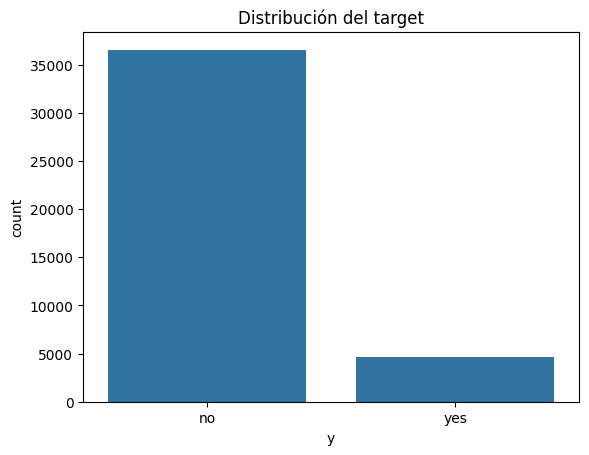

In [ ]:
print(data['y'].value_counts(normalize=True))

sns.countplot(data=data, x='y')
plt.title("Distribución del target")
plt.show()

Distribución variables numericas

Análisis de "pdays"
Valores con 999: 39.500

In [ ]:
data["pdays"].value_counts().head()

,count
pdays,
999,39673
3,439
6,412
4,118
9,64


(41188,)
(1515,)


<Axes: >

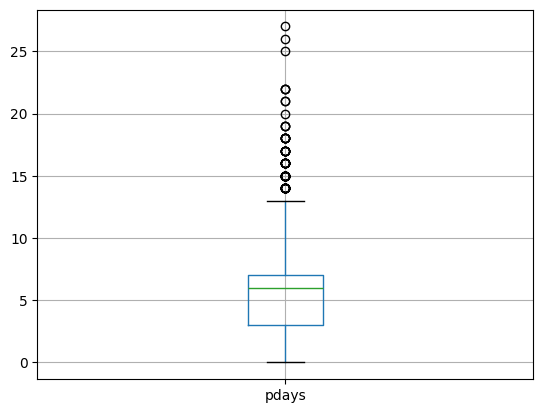

In [ ]:
pdays2 = data[data["pdays"] != 999]
print(data["pdays"].shape)
print(pdays2["pdays"].shape)
pdays2.boxplot("pdays")

<Axes: >

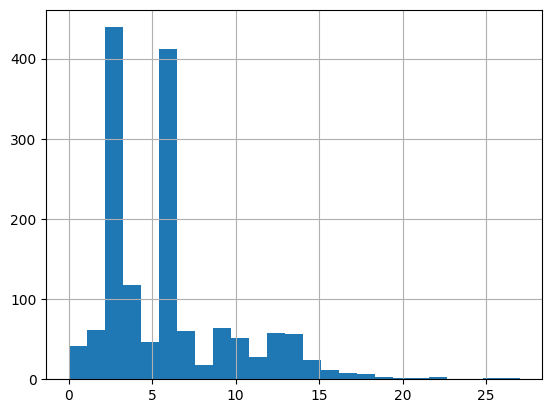

In [ ]:
pdays2["pdays"].hist(bins=25)

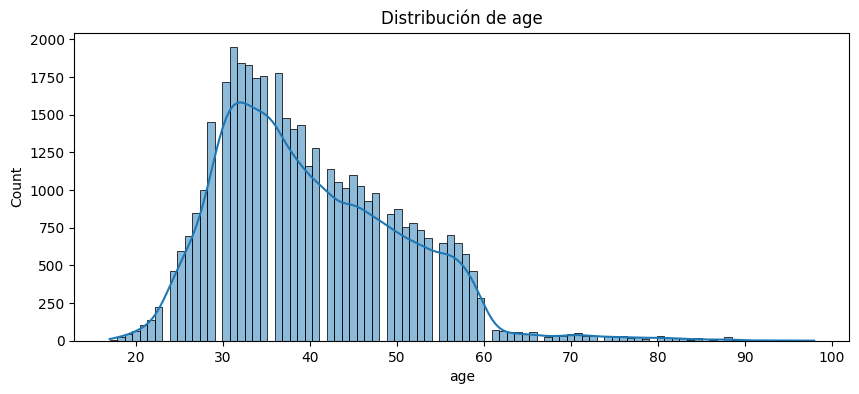

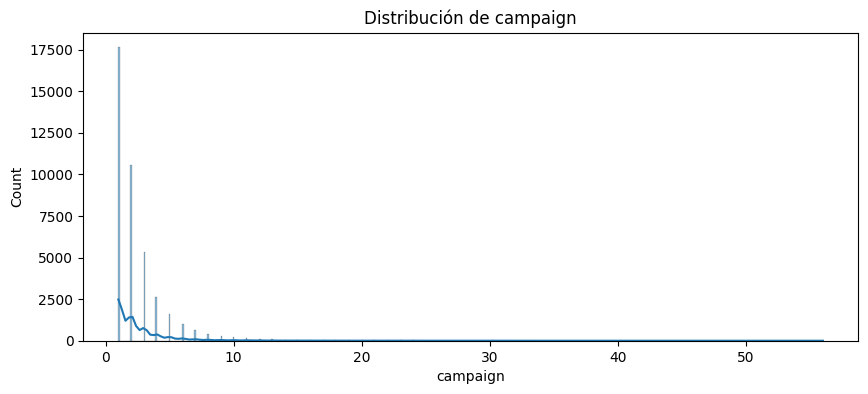

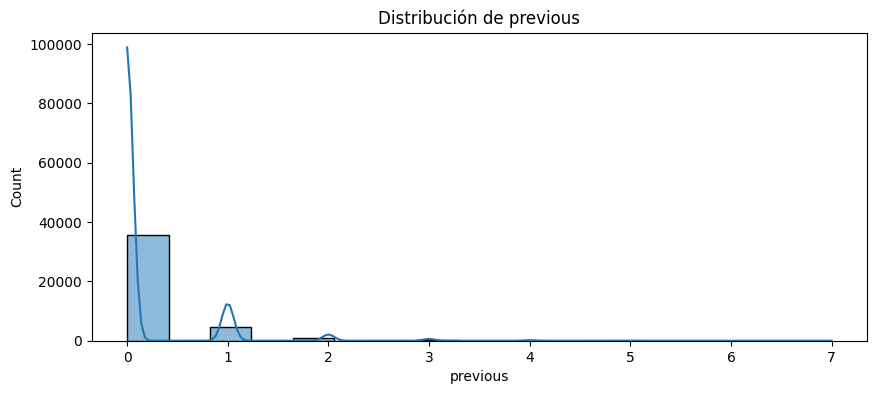

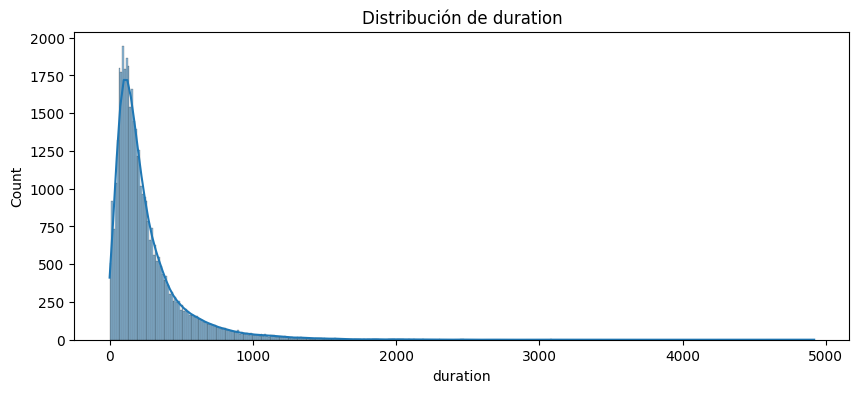

In [ ]:
num_vars = ['age', 'campaign', 'previous', 'duration']

for col in num_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


distribucion variables categoricas

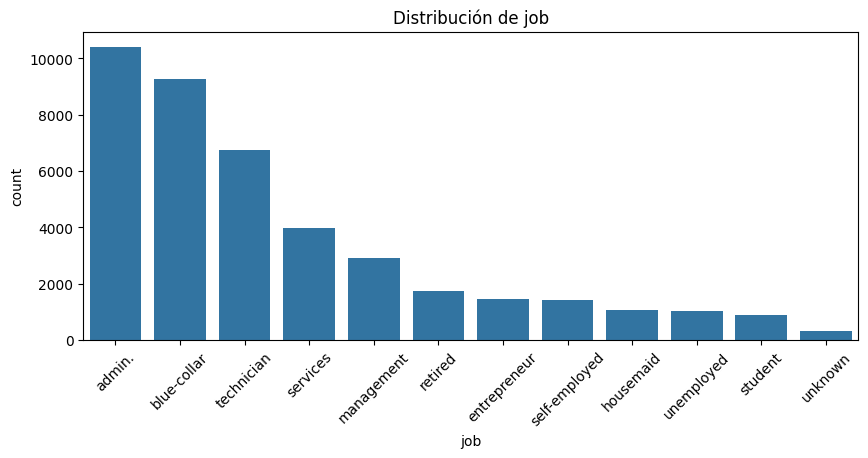

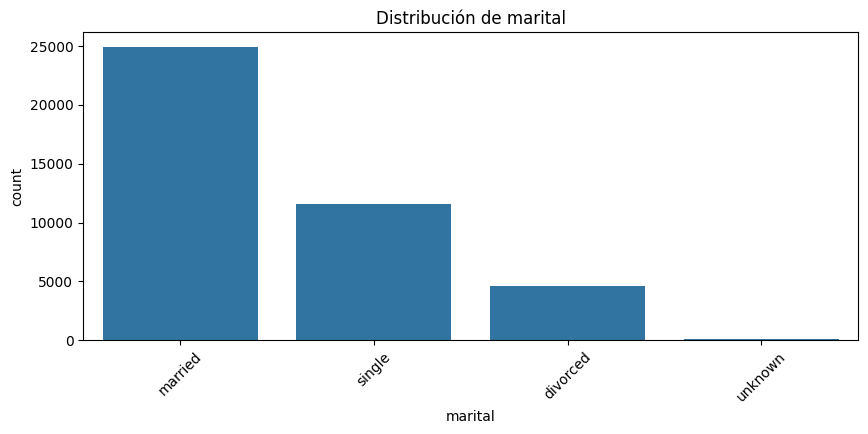

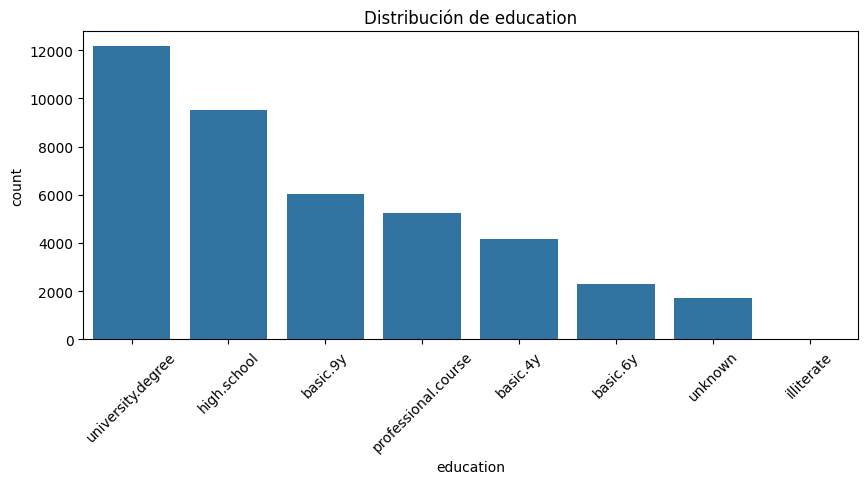

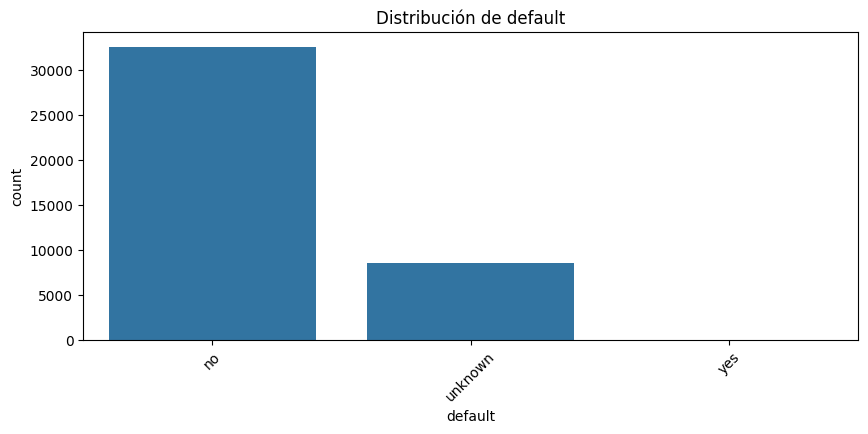

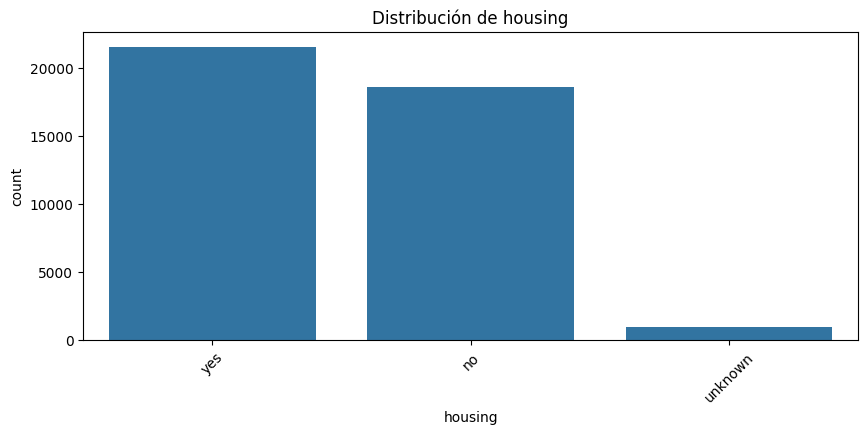

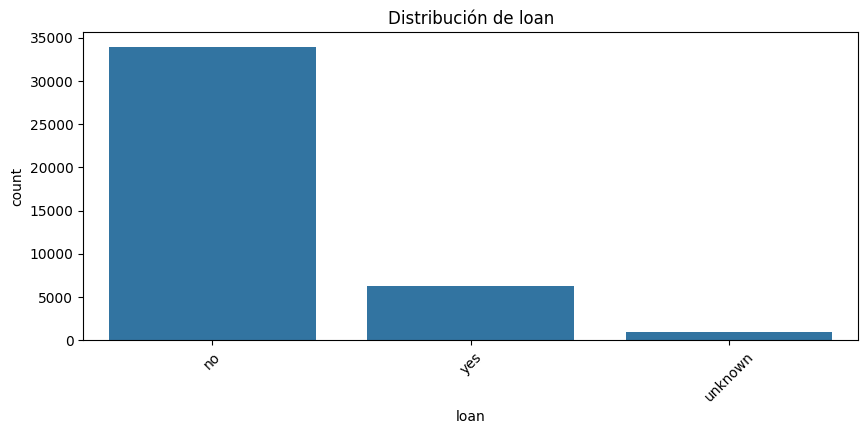

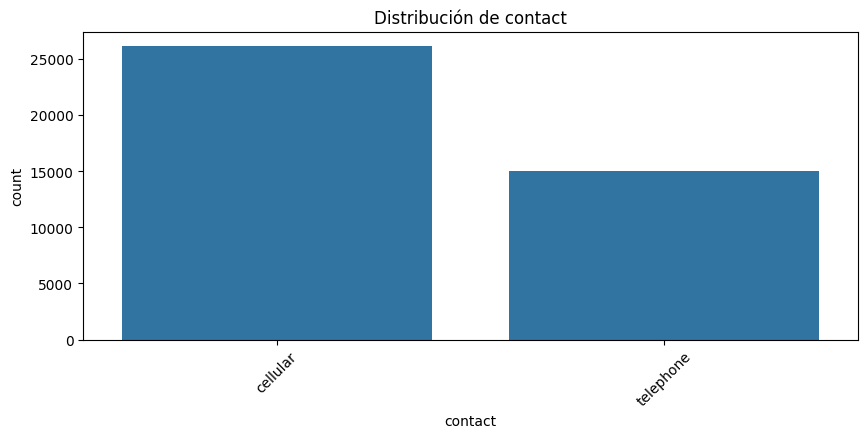

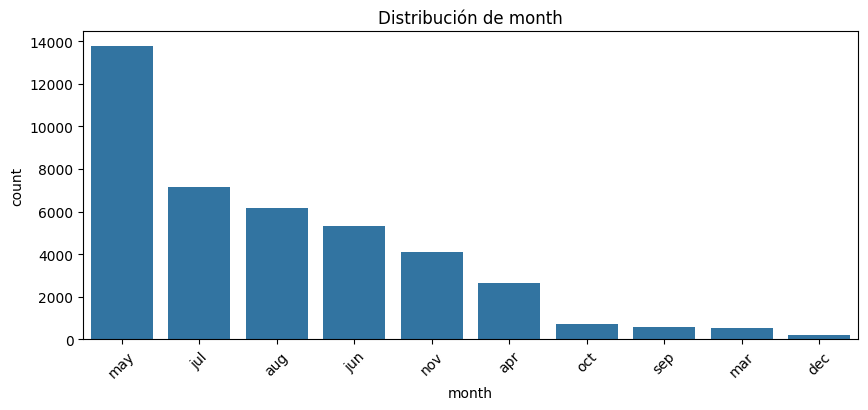

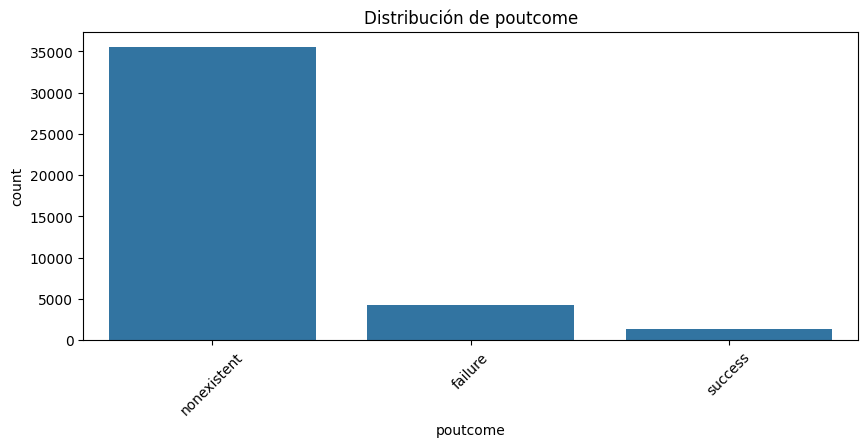

In [ ]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')
    plt.show()

boxplots para ver variables con outliers

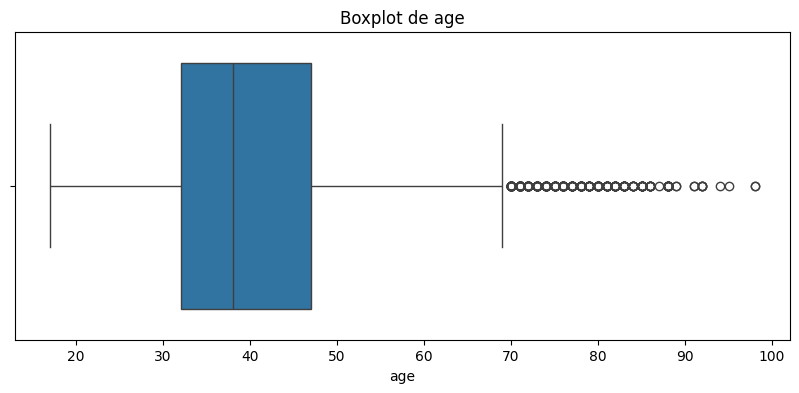

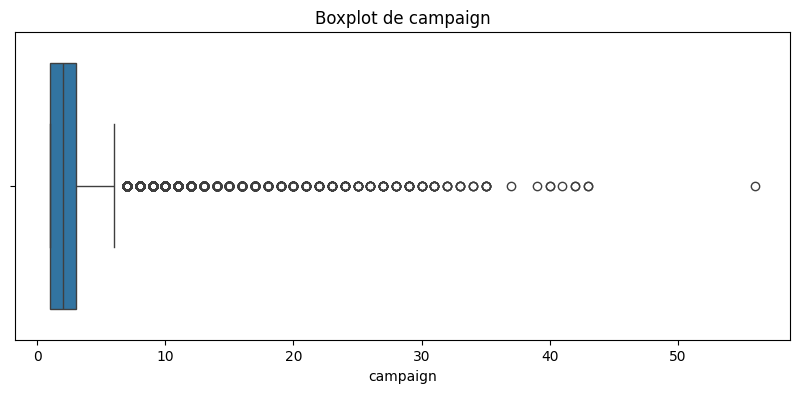

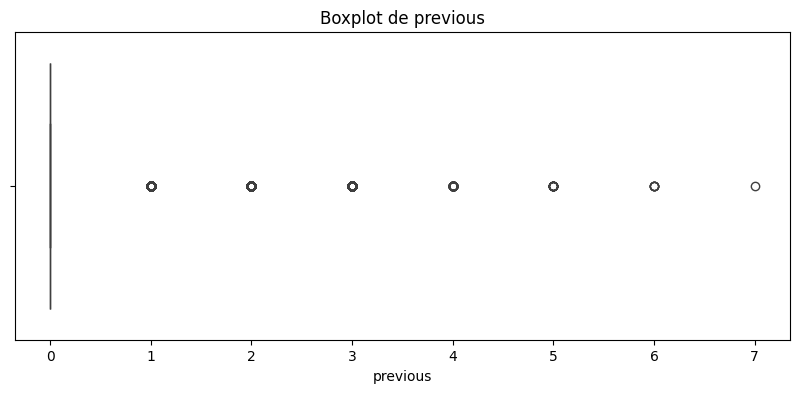

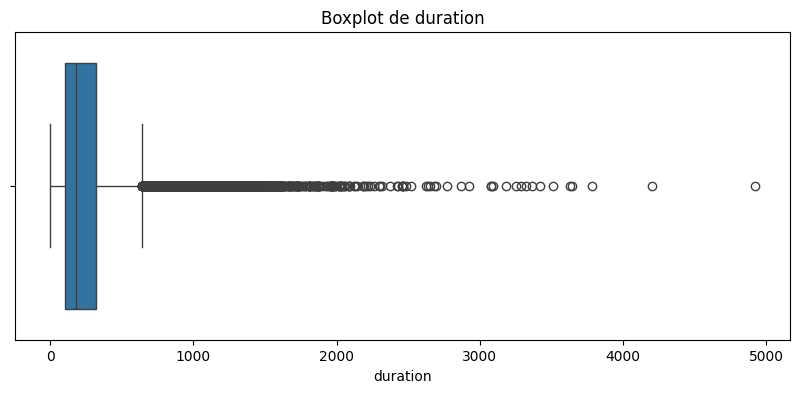

In [ ]:
for col in num_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

---

# Modelo inicial de referencia (Baseline)

Se tiene un modelo base de regresión logística para probar un acercamiento inicial de la viabilidad del proyecto.

Se realizó una codificación y escalado básico para esta tarea; además el entrenamiento y test con solo el 20% de conjunto original de datos.

## Regresión Logistica

In [ ]:
# 1. Seleccionar el 20% del dataset original (estratificado para mantener la proporción de clases)
df_sample, _ = train_test_split(data, test_size=0.80, stratify=data['y'], random_state=67)


In [ ]:
# 2. Separar variables predictoras y objetivo
X = df_sample.drop(columns='y')
y = df_sample['y']


In [ ]:
# 3. Dividir el 20% en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=9821
)


In [ ]:
categorias = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
#tomar variables que no sean dtype = object
numericas = ['age', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
# 4. Escalamiento de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numericas])
X_test_scaled = scaler.transform(X_test[numericas])
train_encoded = pd.get_dummies(X_train[categorias])
y_train_encoded = y_train.map({'yes': 1, 'no': 0})
test_encoded = pd.get_dummies(X_test[categorias])
y_test_encoded = y_test.map({'yes': 1, 'no': 0})
# Convert the scaled NumPy arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numericas, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numericas, index=X_test.index)

# Concatenate the scaled numerical features with the one-hot encoded categorical features
train_final = pd.concat([X_train_scaled_df, train_encoded], axis=1)
test_final = pd.concat([X_test_scaled_df, test_encoded], axis=1)

In [ ]:
# 5. Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(train_final, y_train_encoded)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# 6. Predicciones y evaluación
y_pred = model.predict(test_final)
y_prob = model.predict_proba(test_final)[:, 1]


In [ ]:
# 7. Métricas
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2193
           1       0.65      0.31      0.42       279

    accuracy                           0.90      2472
   macro avg       0.78      0.65      0.68      2472
weighted avg       0.89      0.90      0.89      2472

Confusion Matrix:
[[2146   47]
 [ 192   87]]
ROC AUC: 0.9012220375355278


In [ ]:
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Precision:", precision_score(y_test_encoded, y_pred))
print("Recall:", recall_score(y_test_encoded, y_pred))
print("F1 Score:", f1_score(y_test_encoded, y_pred))

Accuracy: 0.9033171521035599
Precision: 0.6492537313432836
Recall: 0.3118279569892473
F1 Score: 0.4213075060532688


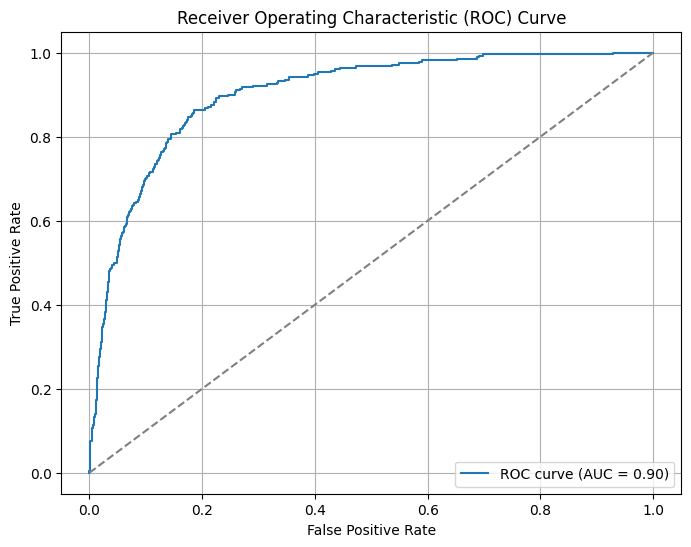

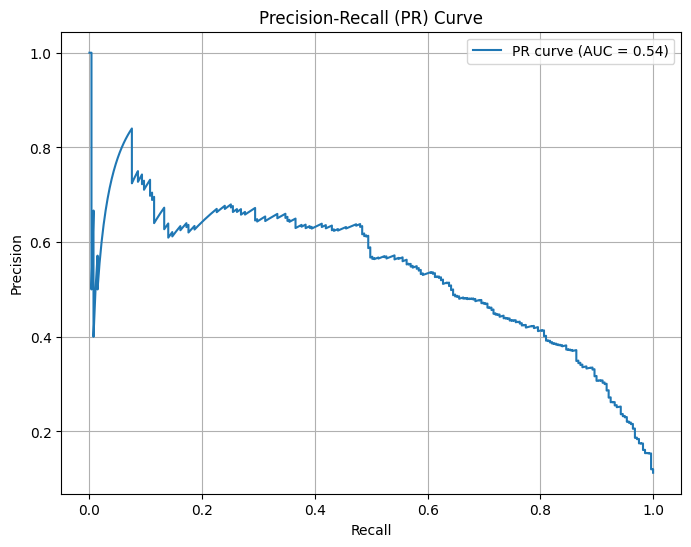

In [ ]:
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
precision, recall, _ = precision_recall_curve(y_test_encoded, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="upper right")
plt.grid()
plt.show()

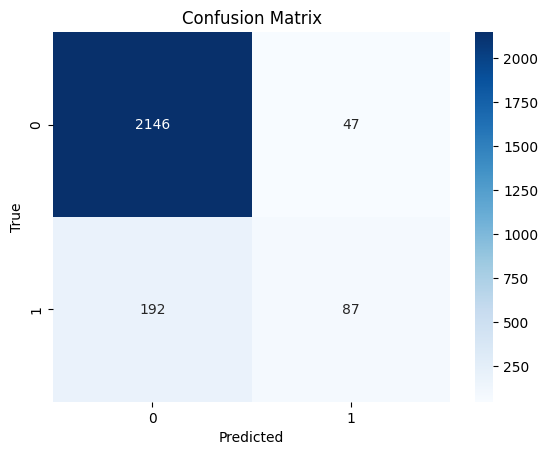

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## ¿Como continuar?

El modelo resultó poseer una buena métrica de accuracy, por lo que el enfoque del proyecto es viable de llevarse a cabo al poder implementarse un modelo capaz de predcir la suscripción o no de un cliente.

Sin embargo, las métricas de precisión y sensibilidad presentan ser demasiado bajas, debido al desbalance que hay en la variable objetivo. Existen más clientes que no se suscriben al depósito que clientes que aceptan.

Esto es un aspecto que debemos trabajar, enfocandonos en los clientes potenciales de la institución bancaria para poder entregar al usuario el objetivo a que apuntar a la hora de realizar campañas publicitarias

# Distribución de las variables de la clase yes de la variable objetivo

In [ ]:
data_yes = data[data['y'] == 'yes']

# Mostrar cuántas filas quedaron
print(f"Filas con y == 'yes': {data_yes.shape[0]}")
data_yes.head()

Filas con y == 'yes': 4640


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


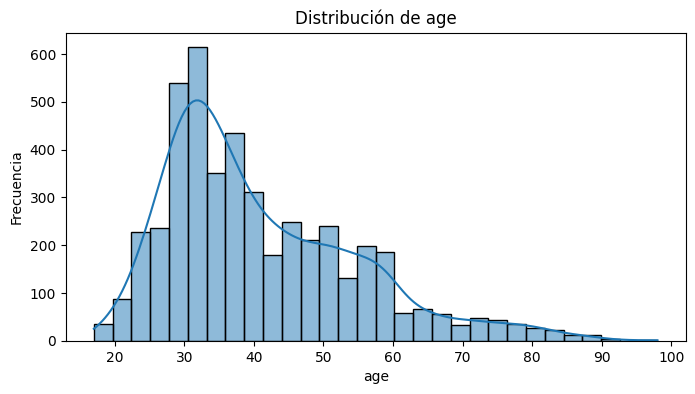

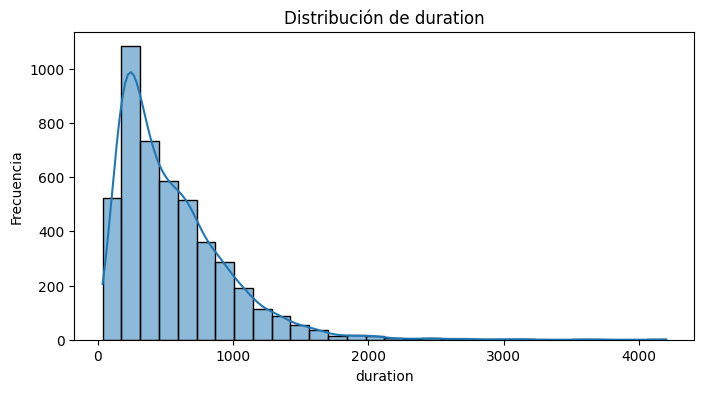

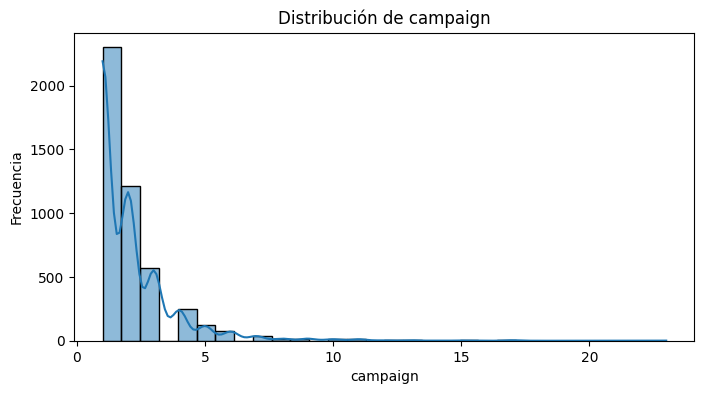

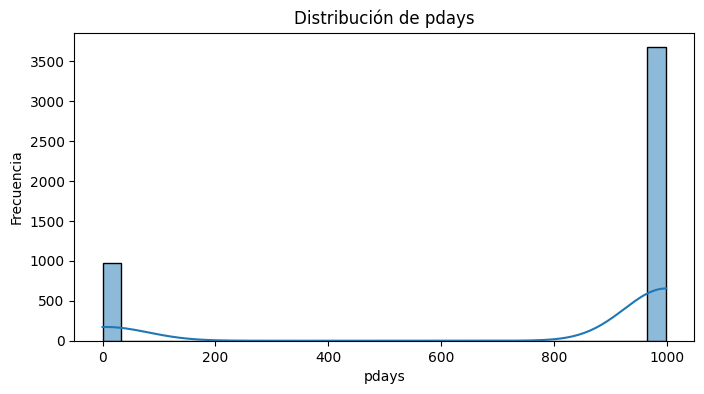

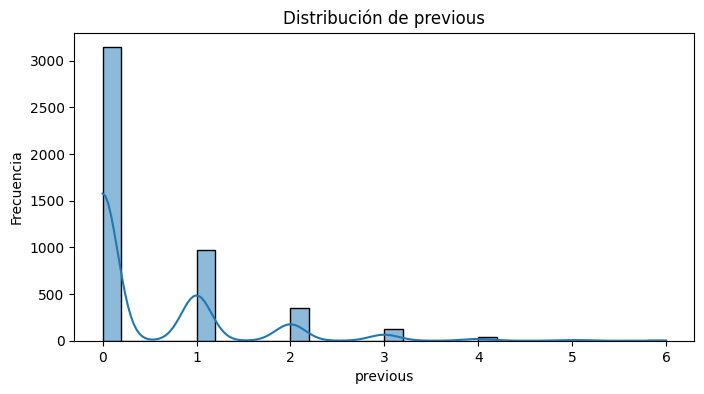

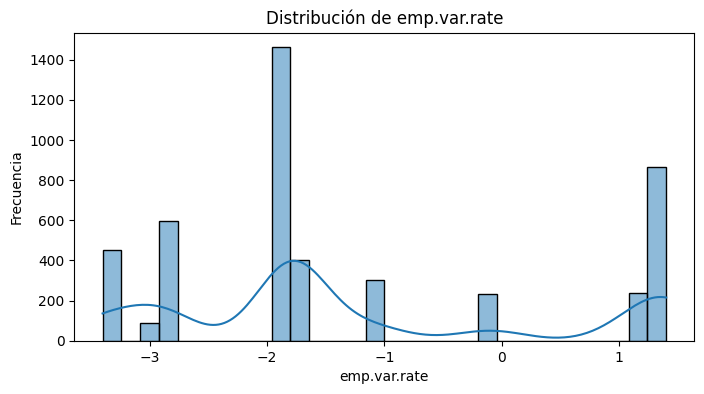

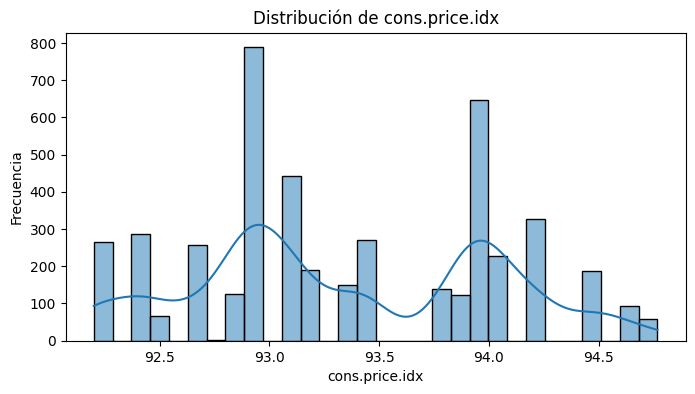

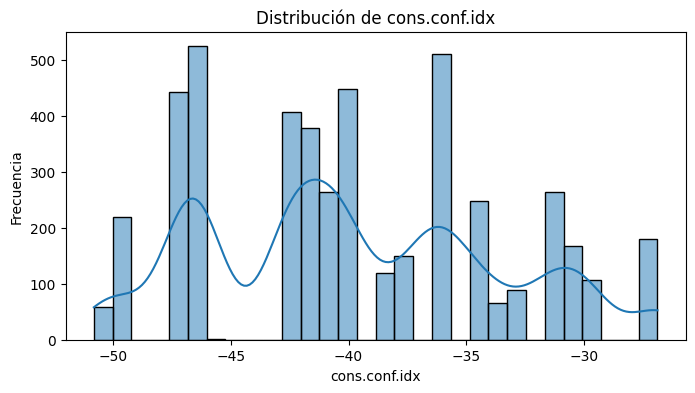

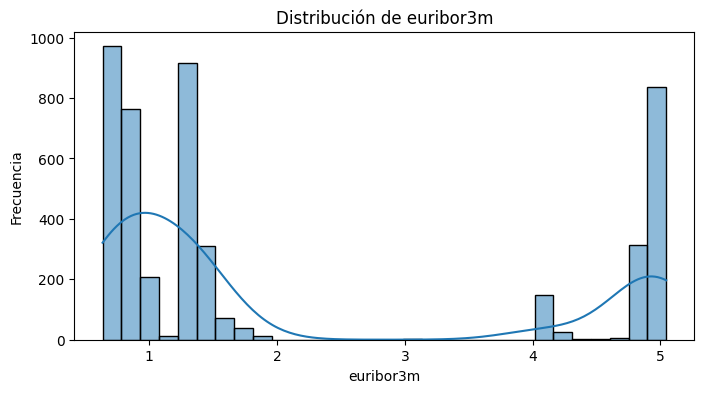

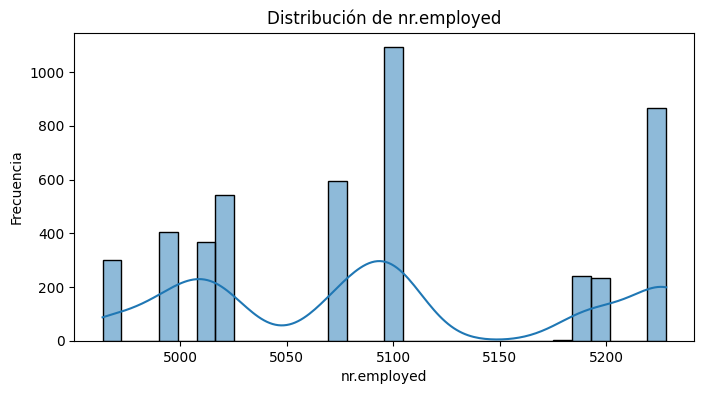

In [ ]:
numeric_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_yes[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


In [ ]:
# Descripción básica
data_yes[numeric_vars].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
age,4640.0,40.91,13.84,17.00,31.00,37.00,50.00,98.00
duration,4640.0,553.19,401.17,37.00,253.00,449.00,741.25,4199.00
campaign,4640.0,2.05,1.67,1.00,1.00,2.00,2.00,23.00
pdays,4640.0,792.04,403.41,0.00,999.00,999.00,999.00,999.00
previous,4640.0,0.49,0.86,0.00,0.00,0.00,1.00,6.00
emp.var.rate,4640.0,-1.23,1.62,-3.40,-1.80,-1.80,-0.10,1.40
cons.price.idx,4640.0,93.35,0.68,92.20,92.89,93.20,93.92,94.77
cons.conf.idx,4640.0,-39.79,6.14,-50.80,-46.20,-40.40,-36.10,-26.90
euribor3m,4640.0,2.12,1.74,0.63,0.85,1.27,4.41,5.04
nr.employed,4640.0,5095.12,87.57,4963.60,5017.50,5099.10,5191.00,5228.10


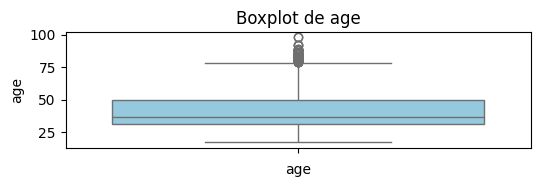

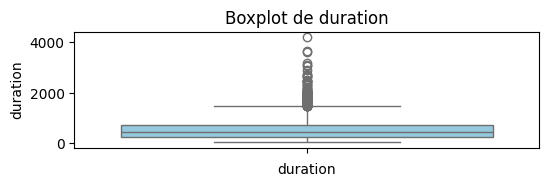

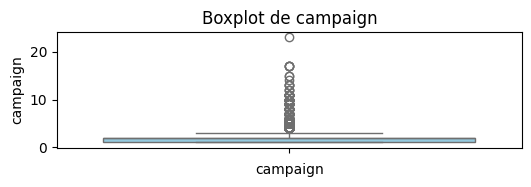

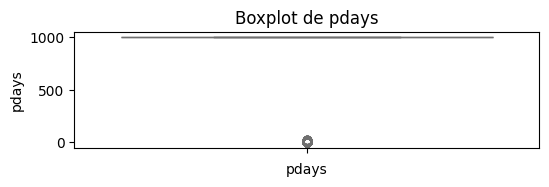

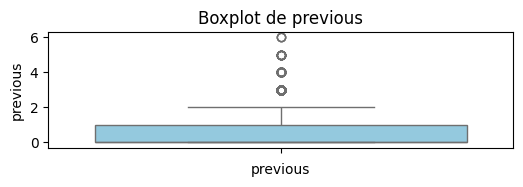

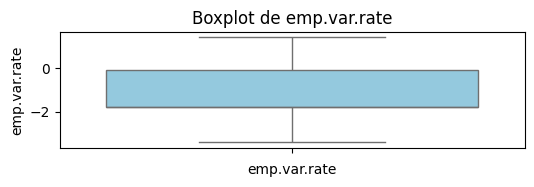

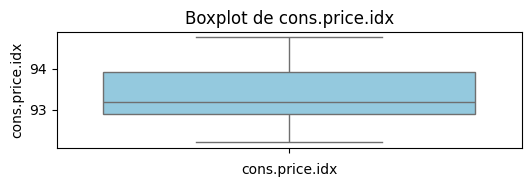

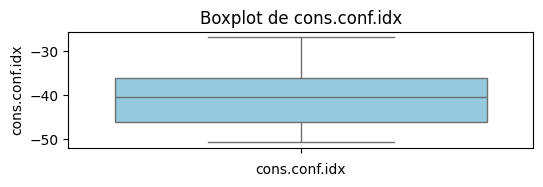

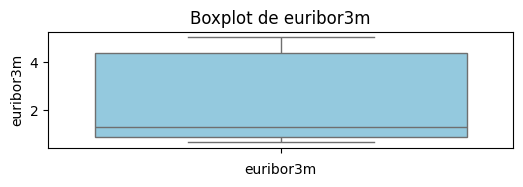

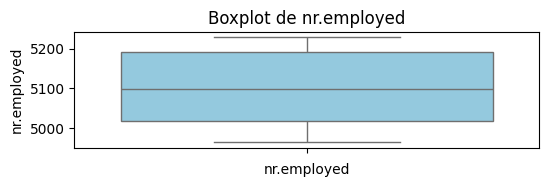

In [ ]:
for var in numeric_vars:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data_yes[var], color='skyblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()


duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y_bin, dtype: float64


<ipython-input-30-5464e02f2d64>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


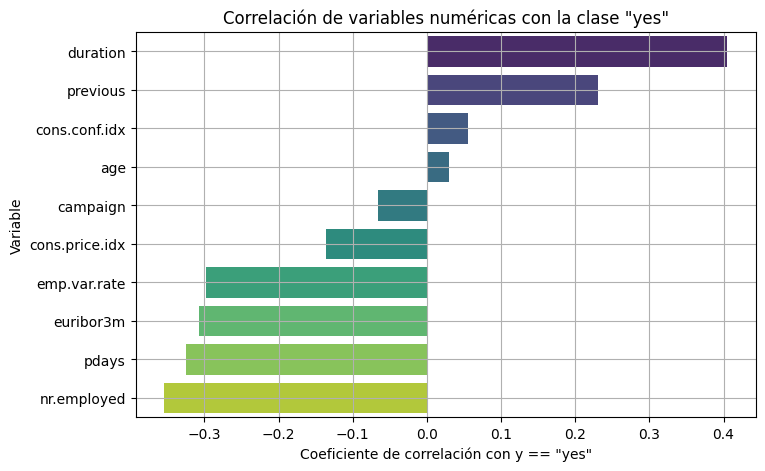

In [ ]:
data_corr = data.copy()
data_corr['y_bin'] = data_corr['y'].apply(lambda x: 1 if x == 'yes' else 0)
correlations = data_corr[numeric_vars + ['y_bin']].corr()['y_bin'].drop('y_bin').sort_values(ascending=False)
print(correlations)
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlación de variables numéricas con la clase "yes"')
plt.xlabel('Coeficiente de correlación con y == "yes"')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

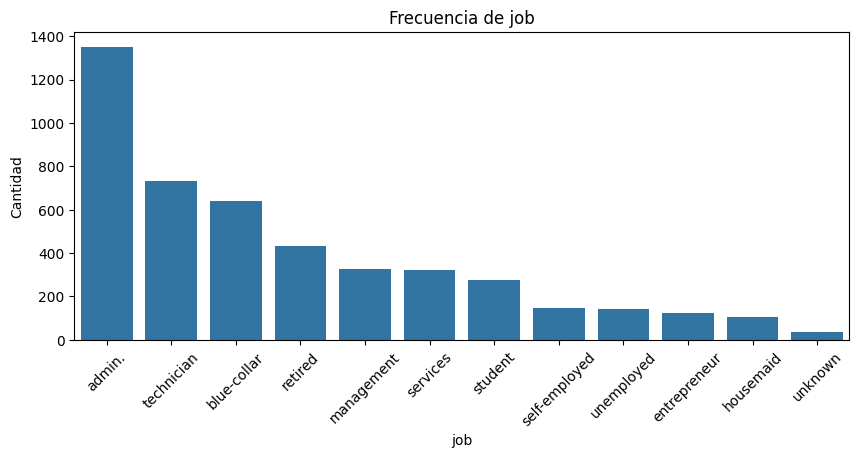

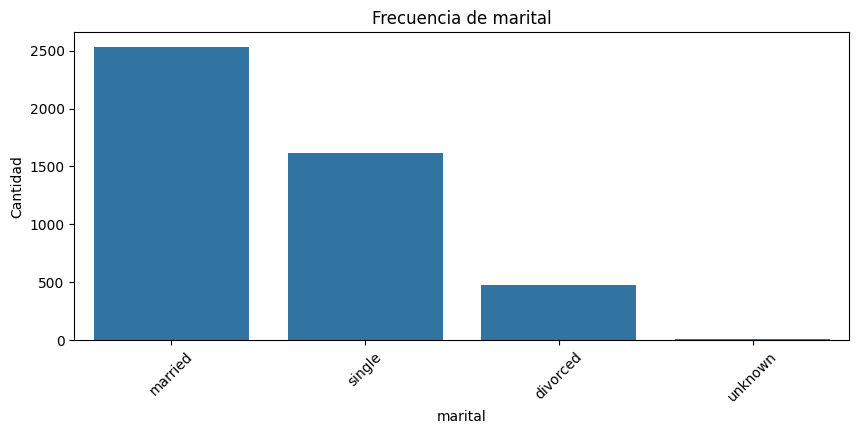

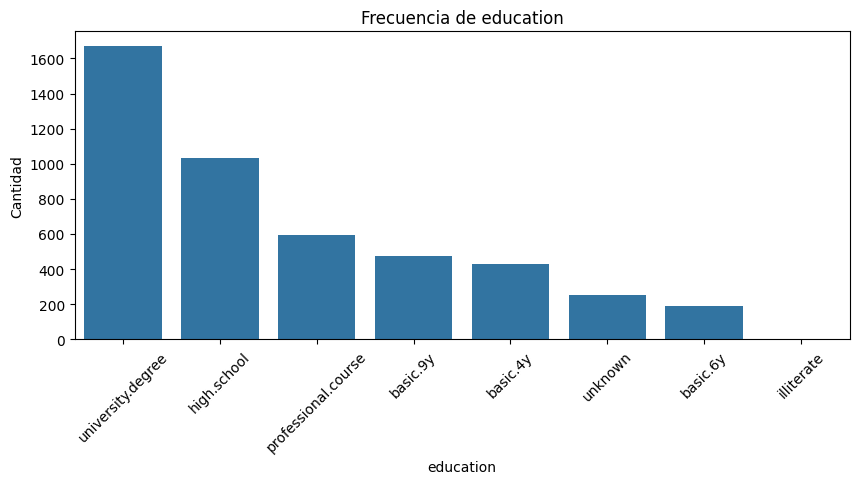

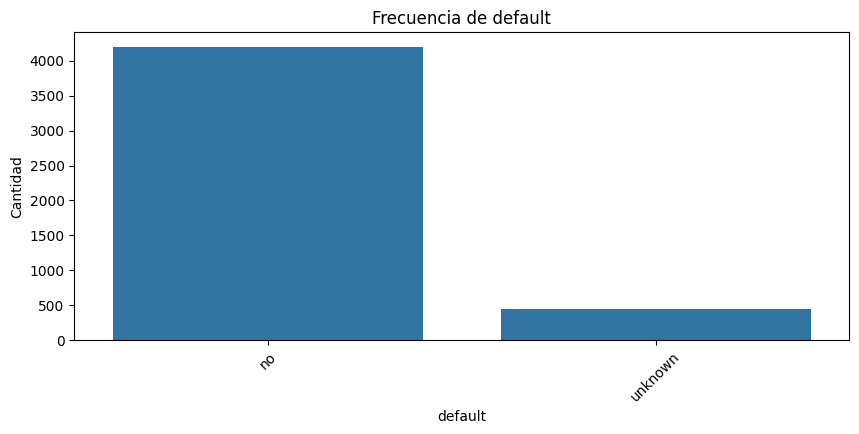

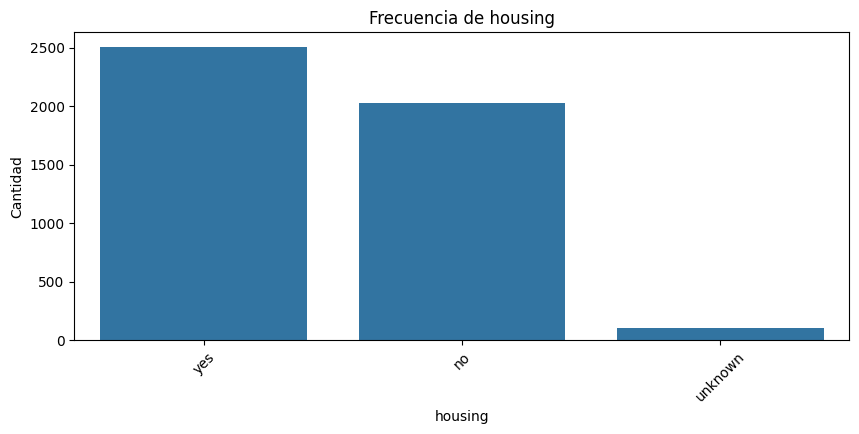

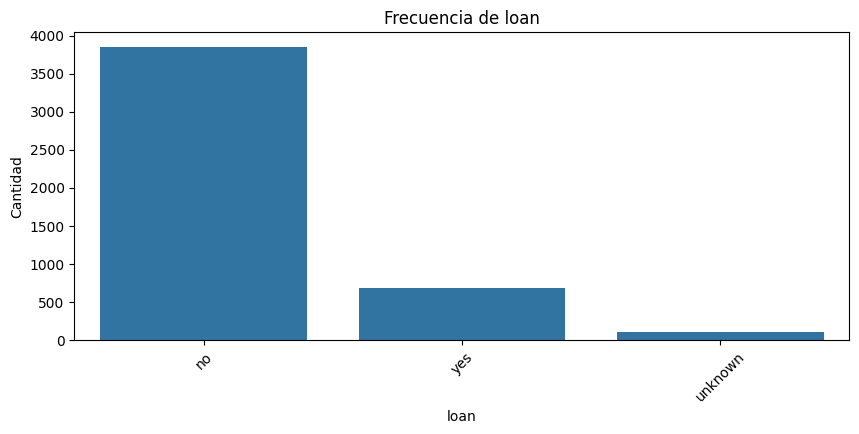

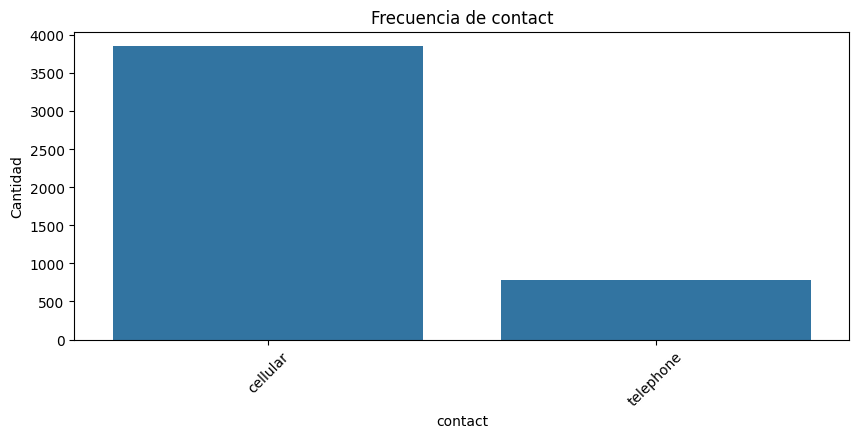

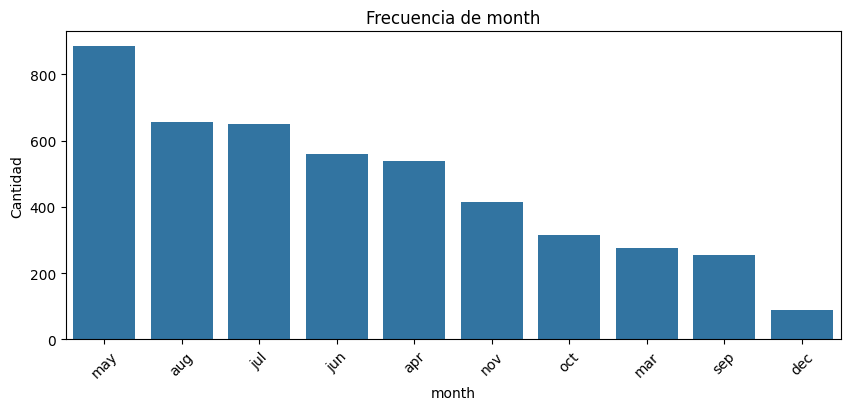

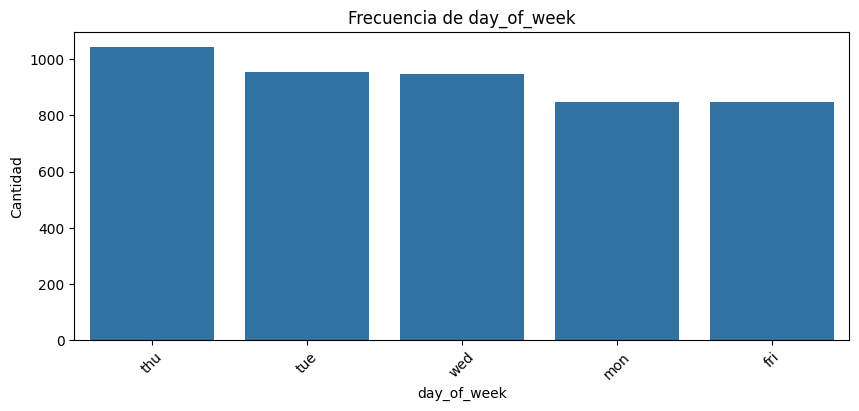

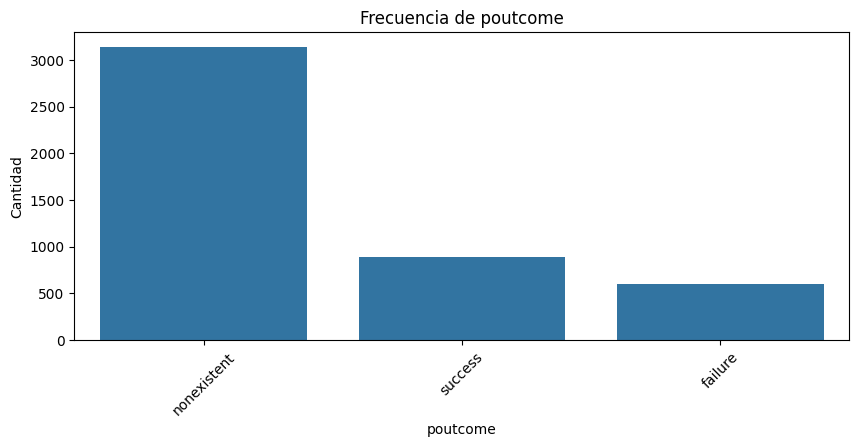

In [ ]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data_yes, x=var, order=data_yes[var].value_counts().index)
    plt.title(f'Frecuencia de {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.show()


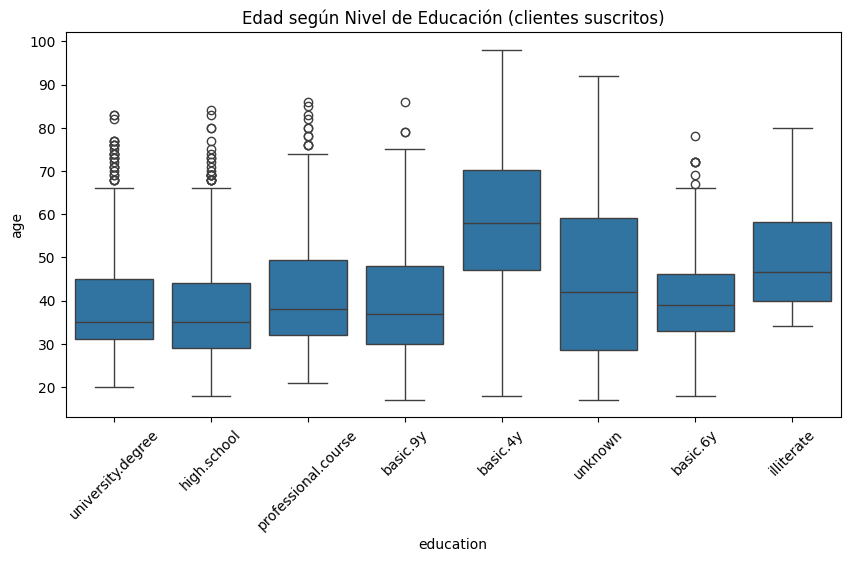

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_yes, x='education', y='age', order=data_yes['education'].value_counts().index)
plt.title('Edad según Nivel de Educación (clientes suscritos)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
summary = {}

for var in categorical_vars:
    summary[var] = data_yes[var].value_counts(normalize=True).round(3) * 100
print("El porcentaje de cada categoría en el conjunto de datos con variable objetivo de clase yes")
print(summary)

El porcentaje de cada categoría en el conjunto de datos con variable objetivo de clase yes
{'job': job
admin.           29.1
technician       15.7
blue-collar      13.8
retired           9.4
management        7.1
services          7.0
student           5.9
self-employed     3.2
unemployed        3.1
entrepreneur      2.7
housemaid         2.3
unknown           0.8
Name: proportion, dtype: float64, 'marital': marital
married     54.6
single      34.9
divorced    10.3
unknown      0.3
Name: proportion, dtype: float64, 'education': education
university.degree      36.0
high.school            22.2
professional.course    12.8
basic.9y               10.2
basic.4y                9.2
unknown                 5.4
basic.6y                4.1
illiterate              0.1
Name: proportion, dtype: float64, 'default': default
no         90.5
unknown     9.5
Name: proportion, dtype: float64, 'housing': housing
yes        54.0
no         43.7
unknown     2.3
Name: proportion, dtype: float64, 'loan': loa

In [ ]:
for col in categorical_vars:
    print(f'\nVariable: {col}')
    display(
        data.groupby(col)['y'].value_counts(normalize=True).unstack().fillna(0).sort_values('yes', ascending=False)
    )


Variable: job


y,no,yes
job,,
student,0.685714,0.314286
retired,0.747674,0.252326
unemployed,0.857988,0.142012
admin.,0.870274,0.129726
management,0.887825,0.112175
unknown,0.887879,0.112121
technician,0.891740,0.108260
self-employed,0.895144,0.104856
housemaid,0.900000,0.100000



Variable: marital


y,no,yes
marital,,
unknown,0.850000,0.150000
single,0.859959,0.140041
divorced,0.896791,0.103209
married,0.898427,0.101573



Variable: education


y,no,yes
education,,
illiterate,0.777778,0.222222
unknown,0.854997,0.145003
university.degree,0.862755,0.137245
professional.course,0.886515,0.113485
high.school,0.891645,0.108355
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246



Variable: default


y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,0.00000



Variable: housing


y,no,yes
housing,,
yes,0.883806,0.116194
no,0.891204,0.108796
unknown,0.891919,0.108081



Variable: loan


y,no,yes
loan,,
no,0.886598,0.113402
yes,0.890685,0.109315
unknown,0.891919,0.108081



Variable: contact


y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313



Variable: month


y,no,yes
month,,
mar,0.494505,0.505495
dec,0.510989,0.489011
sep,0.550877,0.449123
oct,0.561281,0.438719
apr,0.795213,0.204787
aug,0.893979,0.106021
jun,0.894885,0.105115
nov,0.898561,0.101439
jul,0.909534,0.090466



Variable: day_of_week


y,no,yes
day_of_week,,
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671
fri,0.891913,0.108087
mon,0.900517,0.099483



Variable: poutcome


y,no,yes
poutcome,,
success,0.348871,0.651129
failure,0.857714,0.142286
nonexistent,0.911678,0.088322


## Conclusiones:
Personas menores de 40 años, sin una relación matrimonial y con educación superior son los más propensos a aceptar la suscripción al depósito.

Por otro lado, personas con educación básica o que fueron llamadas reiteradas veces en campañas anteriores no son atraidas por la suscripción. Por lo tanto, no se debería seguir insistiendo con los clientes que posean estas características.

# Procesamiento de datos

Se realizó el proecsamiento de datos, observando que el conjunto de datos esta limpio de faltantes o posibles errores en los datos.

Sin embargo, se ha detectado varios valores atípicos entre estos, viendo la cantidad y porcentaje de estos para cada variable numérica.

## Valores atípicos

In [ ]:
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (serie < lower_bound) | (serie > upper_bound)


In [ ]:
data_outliers = data.copy()
for variable in num_vars:
    outliers_mask = detectar_outliers_iqr(data[variable])
    data_outliers[f'is_outlier_{variable}'] = outliers_mask
    outliers = data[variable][outliers_mask]
    print(f"Cantidad de outliers en {variable}:", len(outliers))
    #Identificar porcentaje de estas cantidades en el df
    print(f"Porcentaje de outliers en {variable}:", (len(outliers)/len(data[variable]))*100)

Cantidad de outliers en age: 469
Porcentaje de outliers en age: 1.1386811692726035
Cantidad de outliers en campaign: 2406
Porcentaje de outliers en campaign: 5.8415072351170245
Cantidad de outliers en previous: 5625
Porcentaje de outliers en previous: 13.65689035641449
Cantidad de outliers en duration: 2963
Porcentaje de outliers en duration: 7.193842866854423


Desición tomada: marcar observaciones que tenga (al menos) una variable con un valor outlier como una observación con outlier. No se realizará ninguna eliminación para evitar sesgos en el modelo, generar robustez en el mismo ante datos de validación o despliegue a producción, y poseer una mejor visión de la realidad.

In [ ]:
# drop columnas con is_outliers False en todas las observaciones
# data_outliers = data_outliers.drop(columns = ["is_outlier_euribor3m", "is_outlier_nr.employed", "is_outlier_emp.var.rate", "is_outlier_cons.price.idx"])
cols = ["is_outlier_euribor3m", "is_outlier_nr.employed", "is_outlier_emp.var.rate", "is_outlier_cons.price.idx"]
if all(col in data_outliers.columns for col in cols):
    data_outliers = data_outliers.drop(columns = ["is_outlier_euribor3m", "is_outlier_nr.employed", "is_outlier_emp.var.rate", "is_outlier_cons.price.idx"])
# Crear columna is_outlier con la condicion: is_outliers_age == True or is_outlier_campaign == True or is_outlier_pdays ==True or is_outlier_previous == True or is_outliers_duration ==True or is_outlier_cons.conf.idx ==True
# data_outliers['is_outlier'] = data_outliers[['is_outlier_age', 'is_outlier_campaign', 'is_outlier_pdays', 'is_outlier_previous', 'is_outlier_duration', 'is_outlier_cons.conf.idx']].any(axis=1)

cols_2 = ['is_outlier_age', 'is_outlier_campaign', 'is_outlier_pdays',
        'is_outlier_previous', 'is_outlier_duration', 'is_outlier_cons.conf.idx']

# Filtramos solo las columnas que realmente están en el DataFrame
existing_cols = [col for col in cols_2 if col in data_outliers.columns]

# Aplicamos .any() solo sobre esas columnas
data_outliers['is_outlier'] = data_outliers[existing_cols].any(axis=1)


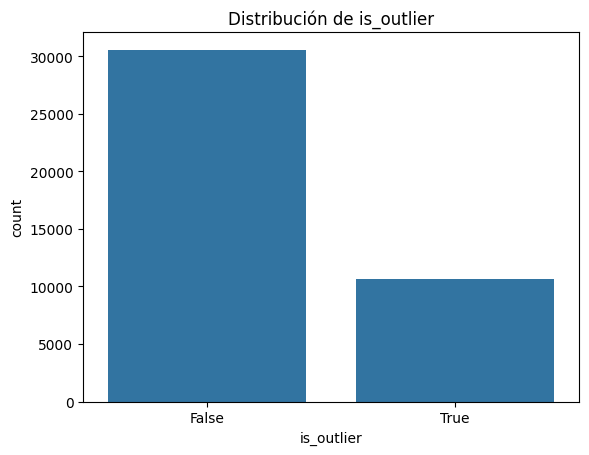

In [ ]:
#agregar la columna is_outlier a data
data['is_outlier'] = data_outliers['is_outlier']
#ver distribución de data_outliers.is_outlier
sns.countplot(data=data, x='is_outlier')
plt.title("Distribución de is_outlier")
plt.show()

In [ ]:
print("Edad mínima:", data['age'].min())
print("Edad máxima:", data['age'].max())

Edad mínima: 17
Edad máxima: 98


Cuando la duración del último contacto fue 0, también tuvo 0 contactos (previous) y no fue contactado (pdays)

In [ ]:
data[(data["duration"] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contactosTotales,campañasExitosasPrevias,is_outlier
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4,0,False
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,10,0,True
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no,3,0,False
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no,2,0,False


In [ ]:
# Duplicados
print("Duplicados exactos:", data.duplicated().sum())
data[data.duplicated()].shape

Duplicados exactos: 12


(12, 24)

# Feature engineering

Se empleo una ingeniería de características más específica para cada las variables. Las principales tareas fueron la construcción de nuevas características y la transformación de variables

## Feature construction

Se creó las variables:

* contactosTotales: suma la cantidad de contactos que se hicieron antes y la cantidad de contactos que hicieron con el cliente durante la última campaña de marketing.

* campañasExitosasPrevias: variable númerica que muestra la cantidad de campañas que tuvieron exito en los clientes y fueron en capañas de marketing anteriores

In [ ]:
# Total de contactos
data['contactosTotales'] = data['campaign'] + data['previous']


# Campañas exitosas previas
data['campañasExitosasPrevias'] = ((data['poutcome'] == 'success') & (data['previous'] > 0)).astype(int)
data["campañasExitosasPrevias"].unique()

,campañasExitosasPrevias
0,0
1,0
2,0
3,0
4,0
...,...
41183,0
41184,0
41185,0
41186,0


## Feature improvenment

### Codificación de variables categóricas

In [ ]:
encode = data.copy()
encode.drop(columns=['is_outlier', 'default',"poutcome"], inplace=True)
encode.dtypes.to_frame()

,0
age,int64
job,object
marital,object
education,object
housing,object
loan,object
contact,object
month,object
day_of_week,object
duration,int64


In [ ]:
encode.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contactosTotales,campañasExitosasPrevias
33464,47,blue-collar,married,basic.9y,no,no,cellular,may,tue,118,...,999,1,-1.8,92.893,-46.2,1.291,5099.1,no,3,0
19158,35,admin.,married,university.degree,yes,no,cellular,aug,tue,385,...,999,0,1.4,93.444,-36.1,4.968,5228.1,no,3,0
10996,41,admin.,married,university.degree,yes,yes,telephone,jun,wed,802,...,999,0,1.4,94.465,-41.8,4.962,5228.1,no,3,0
38992,54,technician,divorced,university.degree,unknown,unknown,cellular,dec,mon,164,...,999,0,-3.0,92.713,-33.0,0.717,5023.5,no,1,0
6277,36,unemployed,single,basic.4y,yes,no,telephone,may,tue,267,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0


target: cambio de etiquetas a binario

In [ ]:
encode['y'] = encode['y'].astype(str)
encode['y'] = encode['y'].map({'no': 0, 'yes': 1})

occupation

In [ ]:
categorical_cols = encode.select_dtypes(include=['object']).columns
cardinality = {}
for col in categorical_cols:
    cardinality[col] = encode[col].nunique()


for col, card in cardinality.items():
    print(f"{col}: {card}")


job: 12
marital: 4
education: 8
housing: 3
loan: 3
contact: 2
month: 10
day_of_week: 5


In [ ]:
encode["previous"].value_counts()

,count
previous,
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


Job: Codificación de categorías por media sobre objetivo (que tanto influe la categoría sobre la variable target, en porecntaje)

In [ ]:
job_target_mean = encode.groupby('job')['y'].mean()
encode['job_target_mean'] = encode['job'].map(job_target_mean)


encode.drop('job', axis=1, inplace=True)
encode.head()

,age,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contactosTotales,campañasExitosasPrevias,previous_bin,job_target_mean
0,56,married,basic.4y,no,no,telephone,may,mon,261,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0.100000
1,57,married,high.school,no,no,telephone,may,mon,149,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0.081381
2,37,married,high.school,yes,no,telephone,may,mon,226,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0.081381
3,40,married,basic.6y,no,no,telephone,may,mon,151,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0.129726
4,56,married,high.school,no,yes,telephone,may,mon,307,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0.081381


Marital: One-hot-encoding ordinario

In [ ]:
marital_dummies = pd.get_dummies(encode['marital'], prefix='marital', dtype=int)
encode = pd.concat([encode, marital_dummies], axis=1)
encode.drop('marital', axis=1, inplace=True)
encode.head()

,age,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,nr.employed,y,contactosTotales,campañasExitosasPrevias,previous_bin,job_target_mean,marital_divorced,marital_married,marital_single,marital_unknown
0,56,basic.4y,no,no,telephone,may,mon,261,1,999,...,5191.0,0,1,0,0,0.100000,0,1,0,0
1,57,high.school,no,no,telephone,may,mon,149,1,999,...,5191.0,0,1,0,0,0.081381,0,1,0,0
2,37,high.school,yes,no,telephone,may,mon,226,1,999,...,5191.0,0,1,0,0,0.081381,0,1,0,0
3,40,basic.6y,no,no,telephone,may,mon,151,1,999,...,5191.0,0,1,0,0,0.129726,0,1,0,0
4,56,high.school,no,yes,telephone,may,mon,307,1,999,...,5191.0,0,1,0,0,0.081381,0,1,0,0


Education: codificación por frecuencia de categorías (el porecntaje de que tan frecuente es la etiqueta)

In [ ]:
education_counts = encode['education'].value_counts(normalize=True)
encode['education_freq_encode'] = encode['education'].map(education_counts)
encode.drop('education', axis=1, inplace=True)
encode.head()

,age,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,...,y,contactosTotales,campañasExitosasPrevias,previous_bin,job_target_mean,marital_divorced,marital_married,marital_single,marital_unknown,education_freq_encode
0,56,no,no,telephone,may,mon,261,1,999,0,...,0,1,0,0,0.100000,0,1,0,0,0.101389
1,57,no,no,telephone,may,mon,149,1,999,0,...,0,1,0,0,0.081381,0,1,0,0,0.231014
2,37,yes,no,telephone,may,mon,226,1,999,0,...,0,1,0,0,0.081381,0,1,0,0,0.231014
3,40,no,no,telephone,may,mon,151,1,999,0,...,0,1,0,0,0.129726,0,1,0,0,0.055647
4,56,no,yes,telephone,may,mon,307,1,999,0,...,0,1,0,0,0.081381,0,1,0,0,0.231014


Housing, Loan y Contact: One-Hot-Encoding ordinario

In [ ]:
housing_dummies = pd.get_dummies(encode['housing'], prefix='housing', dtype=int)
loan_dummies = pd.get_dummies(encode['loan'], prefix='loan', dtype=int)
contact_dummies = pd.get_dummies(encode['contact'], prefix='contact', dtype=int)

encode = pd.concat([encode, housing_dummies, loan_dummies, contact_dummies], axis=1)

encode.drop(['housing', 'loan', 'contact'], axis=1, inplace=True)

encode.head()


,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_unknown,education_freq_encode,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,may,mon,261,1,999,0,1.1,93.994,-36.4,...,0,0.101389,1,0,0,1,0,0,0,1
1,57,may,mon,149,1,999,0,1.1,93.994,-36.4,...,0,0.231014,1,0,0,1,0,0,0,1
2,37,may,mon,226,1,999,0,1.1,93.994,-36.4,...,0,0.231014,0,0,1,1,0,0,0,1
3,40,may,mon,151,1,999,0,1.1,93.994,-36.4,...,0,0.055647,1,0,0,1,0,0,0,1
4,56,may,mon,307,1,999,0,1.1,93.994,-36.4,...,0,0.231014,1,0,0,0,0,1,0,1


Month y Day of Week: codificación ordinal (pasar los meses días de la semana a un orden númerico)

In [ ]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
encode['month'] = encode['month'].map(month_mapping)


day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
encode['day_of_week'] = encode['day_of_week'].map(day_mapping)


### Discretización de variables

 previous: etiquetar por muchos contactos previos, pocos contactos previos, o ningún contacto previo

In [ ]:
#Binning de previous
encode['previous_bin'] = pd.cut(data['previous'], bins=[-1, 0, 2, np.inf], labels=[0, 1, 2])
encode["previous_bin"] = encode["previous_bin"].astype(int)
encode["previous_bin"].value_counts()
# 0: Nada (0 contactos)
# 1: Poco (1 o 2 contactos)
# 2: Mucho (3-7)

,count
previous_bin,
0,35563
1,5315
2,310


# Aplicar tecnica de oversampleo para el balanceo de la variable

Se eligió la tecnica de SMOTE para hacer el remuestreo de datos, así se realiza el balanceo de la variable objetivo.

In [ ]:
x = encode
smote_df = x.copy()
smote_df_y = smote_df['y']
smote_df_x = smote_df.drop('y', axis=1) #definición de variable target

In [ ]:
smote = SMOTE(sampling_strategy = 1, random_state=42) #Tecnica de re-muestreo
X_resampled, y_resampled = smote.fit_resample(smote_df_x, smote_df_y)

# Prueba de Concepto (PoC)

Para la prueba de concepto, se empleo un algoritmo de clasificación de bosque aleatorio (Random Forest), buscando un modelo más rápido y robusto para ladetección de posibles clientes que puedan suscribirse al depósito.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# didvisión del conjunto de entrenmiento y prueba del modelo. Definición del clsificador random forest
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
# número de arboles: 1000, todos con una prfundidad de 10 niveles
rf_model.fit(X_train, y_train)
#Entrenamiento y predicción
y_pred = rf_model.predict(X_test)

In [ ]:
#Métricas de rendimiento: exactitud (accuracy), sensibilidad, precisión, especifidad
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Accuracy: 0.9367305061559508
Sensitivity: 0.9662458836443468
Specificity: 0.907392253136934
Precision: 0.9120580235720761


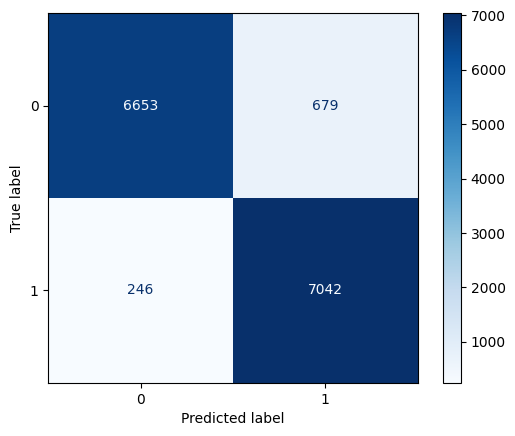

In [ ]:
#Matriz de confusión: 0 = clientes NO suscritos; 1 = clinetes SI suscritos
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

In [ ]:
# F1-score macro (promedio de clases)
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 macro: {f1_macro:.4f}")

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

F1 macro: 0.9367

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7332
           1       0.91      0.97      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



Concluido las métricas, se nota la mejora de predicción de clases; logrando poseer exactitud y precisión mayores de 90%. La clase "yes" tiene un 91% de precisión, sabiendo diferenciar los posibles clientes que se suscriban.

Solo ha habido menos de 1000 predicciones que fueron incorrectas, con 246 casos que no consiguió detectar como clientes suscritos, y 679 casos en el que clientes no suscritos su predicción fue lo contrario; debido a que clientes presentan características similares.

Sin embargo, este modelo es evidencia que el proyecto es viable de hacerse para el banco.
